In [1]:
import cv2
import numpy as np
from PIL import Image

In [3]:
# Read image
img = cv2.imread("../data/supra.jpeg")
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

In [4]:
# Gaussian Filter
K_size = 5
s = 3

# Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

In [5]:
# Kernel
K = np.zeros((K_size, K_size), dtype=np.float)

for x in range(-pad, -pad + K_size):
    for y in range(-pad, -pad + K_size):
        K[y + pad, x + pad] = (x**2 + y**2 - s**2) * np.exp(-(x**2 + y**2) / (2 * (s**2)))
K /= (2 * np.pi * (s**6))
K /= K.sum()

In [6]:
for y in range(H):
    for x in range(W):
        out[pad + y, x + pad] = np.sum(K * tmp[y: y + K_size, x: x + K_size])

out = out.astype(np.uint8)

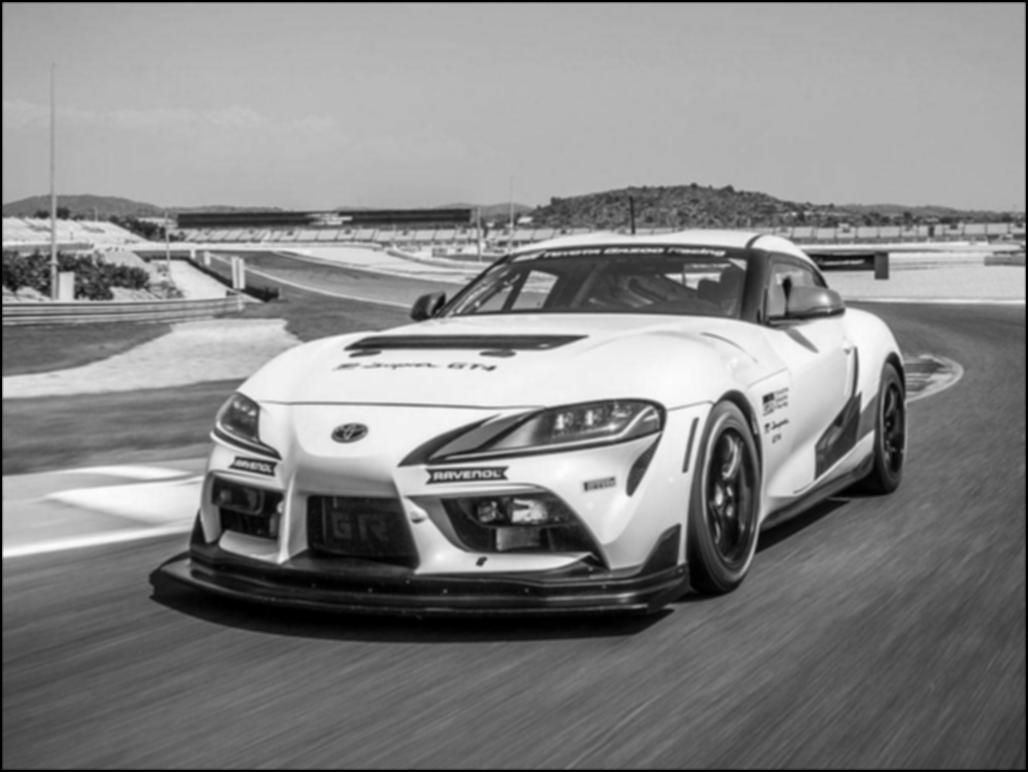

In [7]:
Image.fromarray(out)

In [8]:
cv2.imwrite('./out19_LoGFilter.jpg', out)

True